## Final Project (Midterm)

## Name: Kathryn Lee

## Link to your github repo: https://github.com/nowyouleeme/data1030-final-project

Make sure you are in the DATA1030 environment:

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Intro slide
The intro slide should explain:

**Q1** What is the problem you want to solve? Based on this problem, are you dealing with iid or non-iid data? 

The primary problem I aim to solve is predicting complications following a myocardial infarction (MI), or heart attack, using patient data 24 hours after admission to the hospital. Based on this problem, I am dealing with iid data. Thus, there is no group or time-series aspect to the data by nature of focusing on one specific time point that the data was taken at and because patients do not appear more than once in the dataset. 

**Q2** Why is this important?

Myocardial infarction (MI) presents one of the most complex challenges in modern medicine due to the significant variability in its manifestations among patients. Each year, over a million people in the United States are affected by MI, with 200,000 to 300,000 dying before even reaching the hospital. Alarmingly, someone experiences an MI every 29 seconds, and one patient dies every minute [1].\
MI can occur with or without complications, and these complications can significantly impact long-term prognosis. While some have minimal effects, others can exacerbate the condition and even lead to death. This variability complicates the ability of experienced specialists to predict complications reliably and promptly.\
Therefore, accurately predicting MI complications is essential for enabling early intervention and implementing effective preventive measures.

**Q3** Is this a regression or classification problem?

This is a classification problem, as we are predicting categorical outcomes (complications). The complications, listed in columns 113-124, represent specific, discrete outcomes—whether or not a particular complication is present. This aligns with the nature of classification problems, where the objective is to assign categories or labels to the input data.  
There are multiple target variables that can be considered, but my project will only focus on the lethal outcomes (`LET_IS`).

**Q4** Where did you get the data from?

I obtained this dataset from the UC Irvine Machine Learning Respository in the "Health and Medicine" subject area.

**Q5** How was data the collected?

The dataset was collected at the Krasnoyarsk Interdistrict Clinical Hospital in Russia between 1992 and 1995. It includes data from 1700 separate patients who were admitted for MI, with detailed medical records and information about complications following the event.

**Q6** How does this dataset qualify for the final project?

It contains a lot of missing data, fulfilling the "at least one difficulty" requirement.

### Read in the data

The dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Myocardial infarction complications Database.csv')
display(df)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


**Input Data:** Columns 2-112 represent patient information (medical history, test results, etc.) used for prediction. Different columns may be excluded at different time stages. \
**Output Data:** Columns 113-124 represent possible complications, which serve as the target variables for prediction.

# EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First, you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe (how many datapoints and features are there)?

In [3]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1700
Number of columns:  124


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [4]:
pd.set_option('display.max_rows', 124) # prevent truncation
print('Data types of features:')
print(df.dtypes)

Data types of features:
ID                 int64
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K

**Q3** What is the breakdown of the different features?

According to the supplementary `Myocardial infarction complications Database description` file, I can use all input columns (2-112) except 94, 95, 101, 102, 104, and 105 for prediction since I am focusing on patient data collected at the end of the first day (24 hours after admission to the hospital). Thus, I have omitted R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n from below.

**Continuous variables:**
AGE (years), S_AD_KBRIG (mmHg), D_AD_KBRIG (mmHg), S_AD_ORIT (mmHg), D_AD_ORIT (mmHg), K_BLOOD (mmol/L), NA_BLOOD (mmol/L), ALT_BLOOD (IU/L), AST_BLOOD (IU/L), KFK_BLOOD (IU/L), L_BLOOD (billions per liter), ROE (mm)

**Categorical (binary):**
SEX, IBS_NASL, SIM_GIPERT, nr11, nr01, nr02, nr03, nr04, nr07, nr08, np01, np04, np05, np07, np08, np09, np10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, GIPER_NA, NA_KB, NOT_NA_KB, LID_KB, NITR_S, LID_S_n, B_BLOK_S_n, ANT_CA_S_n, GEPAR_S_n, ASP_S_n, TIKL_S_n, TRENT_S_n 

**Categorical (multi-class):**
IBS_POST, ant_im, lat_im, inf_im, post_im 

**Ordinal:**
INF_ANAM, STENOK_AN, FK_STENOK, GB, DLIT_AG, ZSN_A, TIME_B_S, R_AB_1_n, NA_R_1_n, NOT_NA_1_n  

Many of the categorical and ordinal features are represented as floats, which is a bit hard to catch unless you go through the dataset yourself/read the supplementary document. 

**Q4** Are there any imbalanced classes or missing values? Describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).

See Q5 and Q6 about the imbalanced classes. 

In [5]:
df.drop(df.columns[112:123], axis=1, inplace=True) # drop unused target variables, 11 removed
df.drop(columns=['ID', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], inplace=True) # drop unused features, 7 removed
display(df)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


Dropped column `ID` because it does not contribute to the prediction power of the model. I also dropped the other categories that the dataset description advised that I drop because of data leakage issues. 

In [6]:
# missing values
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("\n")
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print("Missing values percentage per column:")
print(missing_percentage_sorted)
frac_missing = (df.isna().sum(axis=1) != 0).sum() / df.shape[0]
print("Percentage of points with at least one missing value:", 100*round(frac_missing, 4), "%")

Number of rows:  1700
Number of columns:  106


Missing values percentage per column:
LET_IS            0.000000
SEX               0.000000
IM_PG_P           0.058824
INF_ANAM          0.235294
NA_R_1_n          0.294118
zab_leg_06        0.411765
zab_leg_04        0.411765
zab_leg_03        0.411765
zab_leg_02        0.411765
zab_leg_01        0.411765
AGE               0.470588
SIM_GIPERT        0.470588
GB                0.529412
NITR_S            0.529412
NOT_NA_1_n        0.588235
endocr_03         0.588235
endocr_02         0.588235
LID_S_n           0.588235
fibr_ter_08       0.588235
fibr_ter_07       0.588235
fibr_ter_06       0.588235
fibr_ter_05       0.588235
fibr_ter_03       0.588235
fibr_ter_02       0.588235
fibr_ter_01       0.588235
B_BLOK_S_n        0.647059
endocr_01         0.647059
GT_POST           0.705882
SVT_POST          0.705882
O_L_POST          0.705882
FIB_G_POST        0.705882
ANT_CA_S_n        0.764706
MP_TP_POST        0.823529
K_SH_POST         0.882

All columns except for `SEX` and the target variable `LET_IS` contain missing values.  
Based on this information at first glance, I will drop features `IBS_NASL` (binary categorical) and `KFK_BLOOD` (continuous feature) since these columns have over 80% missing values. This threshold is set since, beyond this point, these columns lack enough information to be helpful in solving the problem.  
Features `NA_KB`, `LID_KB`, `NOT_NA_KB`, `D_AD_KBRIG`, and `S_AD_KBRIG` are a bit trickier since they do have a significant portion of data missing. I will have to further consider if their missingness is random or critical for analysis, so I won't drop them just yet.  
I will have to do imputation on essentially every point. 

In [7]:
df.drop(columns=['IBS_NASL', 'KFK_BLOOD'], inplace=True) # drop columns with over 80% missing values
display(df)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


**Q5** The ML target variable in this dataset is the lethal outcomes. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.

In [8]:
# .describe = insightful when data is continuous
print("Is the target variable continuous?")
print(df["LET_IS"].describe())
print("\n")
print("Is the target variable categorical?")
# .value_counts = insightful when data is categorical
print(df["LET_IS"].value_counts())

Is the target variable continuous?
count    1700.000000
mean        0.477059
std         1.381818
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: LET_IS, dtype: float64


Is the target variable categorical?
LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64


This dataset includes multiple possible target variables (as stated by the authors themselves), ranging from atrial fibrillation and pulmonary edema to relapse of the myocardial infarction and the lethal outcome. While handling multiple target variables at once would be the most holistic approach, due to the limitations of supervised learning, I am going to focus on the target variable "lethal outcome (cause)," or "LET_IS" for its greater robustness relative to the other target variables. "LET_IS" is categorical, according to the dataset's description PDF provided, in which each data point is labeled with an integer ranging from 0-7 with an associated outcome: healthy/alive (0), cardiogenic shock (1), pulmonary edema (2), myocardial rupture (3), progress of congestive heart failure (4), thromboembolism (5), asystole (6), and ventricular fibrillation (7). The other target variables are also categorical but are all in the format of yes/no for a given condition, which is quite limiting. \
We can also check that this by using the .describe() and .value_counts() function, in which .value_counts() (which is best for represting categoriccal data) was the only function that gave us useful information in understanding the lethal outcome data (how many of each lethal outcome was recorded for the data points). On the other hand, the .describe() (which is best for continuous data) function did not give us any useful additional information about the data, in which the statistical calculations (mean, standard deviation, max, etc.) doesn't make it any easier to work with or represent the discrete categories of the "LET_IS" target variable. 

**Q6** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

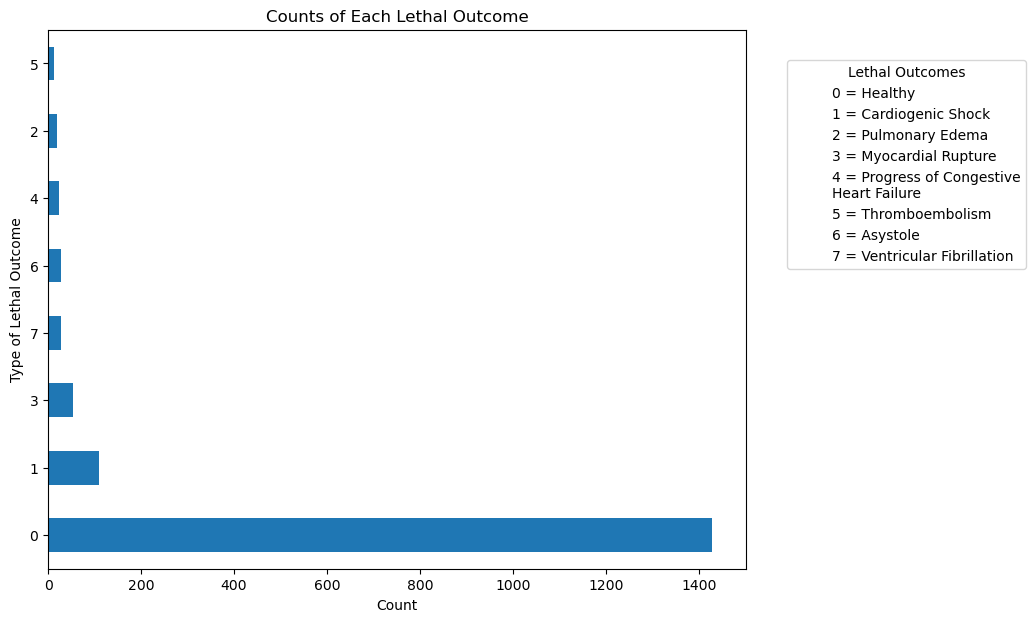

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,7))
df["LET_IS"].value_counts().plot.barh()
plt.title('Counts of Each Lethal Outcome')
plt.ylabel('Type of Lethal Outcome')
plt.xlabel('Count')
# Manually add a legend without colors (remove color parts)
labels = ['0 = Healthy', '1 = Cardiogenic Shock', '2 = Pulmonary Edema', 
              '3 = Myocardial Rupture', '4 = Progress of Congestive\nHeart Failure', 
              '5 = Thromboembolism', '6 = Asystole', '7 = Ventricular Fibrillation']
handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title= "Lethal Outcomes", handles=handles, labels=labels)

plt.savefig('figures/to use/count_lethal_outcome.png', dpi=300, bbox_inches='tight')

plt.show()

There is significant imbalance of classes, with 84.06% of points labeled as "alive/healthy" (0) and the remaining 15.94% falling into one of the 5 other possible categories.

**Q7** Create as many figures you can to better understand your dataset and calculate summary statistics as well. Then, select three figures that you want to show during the presentation. \
Explain why you chose the figures! Why are they interesting, unexpected, important?

First, I'd like to handle the missing values of the categorical and ordinal features. To impute these, I will just manually add another category/order that stands for missing/unknown outcomes. I will handle the continuous variables a bit later. 

In [110]:
# Fill in with new "unknown" categories represented by an unused integer for the categorical data
add_2_as_unknown = [
    'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08',
    'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01',
    'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
    'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
    'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01',
    'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
    'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08',
    'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03',
    'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11',
    'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
    'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n',
    'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n',
    'TRENT_S_n'
]
add_3_as_unknown = ['IBS_POST']
add_4_as_unknown = ['INF_ANAM', 'GB', 'R_AB_1_n']
add_5_as_unknown = ['FK_STENOK', 'ZSN_A', 'NA_R_1_n', 'NOT_NA_1_n', 'ant_im', 'lat_im', 'inf_im', 'post_im']
add_7_as_unknown = ['STENOK_AN']
add_8_as_unknown = ['DLIT_AG']
add_10_as_unknown = ['TIME_B_S']

df[add_2_as_unknown] = df[add_2_as_unknown].fillna(2)
df[add_3_as_unknown] = df[add_3_as_unknown].fillna(3)
df[add_4_as_unknown] = df[add_4_as_unknown].fillna(4)
df[add_5_as_unknown] = df[add_5_as_unknown].fillna(5)
df[add_7_as_unknown] = df[add_7_as_unknown].fillna(7)
df[add_8_as_unknown] = df[add_8_as_unknown].fillna(8)
df[add_10_as_unknown] = df[add_10_as_unknown].fillna(10)

missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
# print("Missing values percentage per column:")
# print(missing_percentage_sorted)

# HANDLED ALL MISSING VALUES except continuous
df_whole = df
y = df['LET_IS']
X = df.drop(columns=['LET_IS'])
categories = y.unique()
print(X.shape)
all_features = X.columns.tolist()
continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']
ordinal_features = [
    'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 
    'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n'
]
units = ['years', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmol/L', 'mmol/L', 'IU/L', 'IU/L', 'billions per liter', 'mm']
print("\n")
categorical_features = list(set(all_features) - set(continuous_features) - set(ordinal_features))
# Define separate color palettes
categorical_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # For categorical features
ordinal_colors = ['#e41a1c', '#377eb8', '#FFEA00', '#ff7f00', '#66c2a5', '#a65628', '#984ea3', '#ff69b4']  # For ordinal features (updated)
labels = ['0 = Healthy', '1 = Cardiogenic Shock', '2 = Pulmonary Edema', 
              '3 = Myocardial Rupture', '4 = Progress of Congestive\nHeart Failure', 
              '5 = Thromboembolism', '6 = Asystole', '7 = Ventricular Fibrillation']

# print("CATEGORICAL FEATURES")
# # plot categorical features against the target variable
# # stacked bar plot: categorical vs lethal outcome (categorical)
# for categorical_ftr in categorical_features:
#     count_matrix = df_whole.groupby([categorical_ftr, 'LET_IS']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
#     # Plot with colors for ordinal features
#     count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=categorical_colors[:count_matrix.shape[1]])
    
#     # Move the legend outside of the plot
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='LET_IS', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
#     # Set the title and label
#     plt.title(f'{categorical_ftr} vs. possible lethal outcomes')
#     plt.ylabel('Fraction of lethal outcomes')
    
#     # Adjust layout to ensure everything fits
#     plt.savefig(f'figures/stacked bar plots/{categorical_ftr} vs. possible lethal outcomes.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()  
#     plt.show()
    
# print("\n")
# print("ORDINAL FEATURES")
# # plot ordinal features against the target variable
# for ordinal_ftr in ordinal_features:
#     count_matrix = df_whole.groupby([ordinal_ftr, 'LET_IS']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    
#     # Plot with colors for ordinal features
#     count_matrix_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=ordinal_colors[:count_matrix.shape[1]])
    
#     # Move the legend outside of the plot
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title='LET_IS', borderaxespad=0., labels=labels, fontsize="small")  # Adjust legend outside
    
#     # Set the title and label
#     plt.title(f'{ordinal_ftr} vs. possible lethal outcomes')
#     plt.ylabel('Fraction of lethal outcomes')
    
#     # Adjust layout to ensure everything fits
#     plt.savefig(f'figures/stacked bar plots/{ordinal_ftr} vs. possible lethal outcomes.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()  
#     plt.show()

# # plot continuous features against the target variable
# # category specific histograms
# for i, continuous_ftr in enumerate(continuous_features):
#     plt.figure(figsize=(10,6))
#     bin_range = (df_whole[continuous_ftr].min(), df_whole[continuous_ftr].max())
#     for c in categories:
#         plt.hist(df_whole[df_whole['LET_IS']==c][continuous_ftr], alpha=0.5, label=c, range=bin_range,bins=20, density=True)
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), labels=labels, fontsize="small")
#     plt.suptitle('') # that's what you're after
#     plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
#     plt.ylabel('Fraction of lethal outcomes')
#     plt.xlabel(continuous_ftr)
#     plt.savefig(f'figures/category-specific histograms/{continuous_ftr} vs. possible lethal outcomes.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show() 
    
# # box plot
# for i, continuous_ftr in enumerate(continuous_features):
#     df_whole[[continuous_ftr, 'LET_IS']].boxplot(by='LET_IS', figsize=(7,5))
#     plt.suptitle('') # that's what you're after
#     plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
#     plt.xlabel('Lethal outcomes')
#     plt.ylabel(f'{continuous_ftr} ({units[i]})')

#     # Manually add a legend without colors (remove color parts)
#     handles = [plt.Line2D([0], [0], lw=0)] * len(labels)  # Empty lines (no color)
    
#     plt.legend(loc=6, bbox_to_anchor=(1.05, 0.75), title="Lethal Outcomes", handles=handles, labels=labels, fontsize="small")
#     plt.savefig(f'figures/box plots/{continuous_ftr} vs. possible lethal outcomes.png', dpi=300, bbox_inches='tight')
#     plt.show()
    
# violin plot 
# for continuous_ftr in continuous_features:
#     dataset=[df_whole[df_whole['LET_IS']==0][continuous_ftr].values,
#              df_whole[df_whole['LET_IS']==1][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==2][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==3][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==4][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==5][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==6][continuous_ftr].values,
#             df_whole[df_whole['LET_IS']==7][continuous_ftr].values]
#     plt.figure(figsize=(5,3))
#     plt.violinplot(dataset = dataset)
#     plt.title(f'{continuous_ftr} vs. possible lethal outcomes')
#     plt.ylabel(continuous_ftr)
#     plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0', '1', '2', '3', '4', '5', '6', '7'])  # Custom labels
#     plt.xlabel('Lethal outcomes')
#     plt.show() 

(1700, 103)




Things to note: recall that the only columns with missing values are the continuous features. We don't run into any issues visualizing the categorical or ordinal features against the target variables, but we have some bumps visualizing the continuous features against the target variable. Violin plots are incapable of handling missing values directly, meaning that they are not a great tool for visualization at this point since we have yet to deal with the missing values of the continuous features. On the other hand, histograms and box plots directly handle missing values in these features by either excluding/ignoring NaN values automatically from the data being plotted. Thus, the missing values of the continuous features may yield inaccurate/incomplete visualiations. But this gives us good initial insight into the distribution of the data! 

**Q8** Observe feature relationships (correlation).

1. Calculate the Pearson correlation matrix of the features.
Features: nr_01 and nr_02 | Correlation: 0.88
Features: nr_01 and nr_07 | Correlation: 0.97
Features: nr_02 and nr_07 | Correlation: 0.90
Features: nr_04 and nr_07 | Correlation: 0.86
Features: nr_01 and nr_08 | Correlation: 0.95
Features: nr_02 and nr_08 | Correlation: 0.88
Features: nr_07 and nr_08 | Correlation: 0.97
Features: np_01 and nr_07 | Correlation: 0.86
Features: np_01 and np_04 | Correlation: 0.97
Features: np_01 and np_05 | Correlation: 0.92
Features: np_04 and np_05 | Correlation: 0.91
Features: np_07 and nr_07 | Correlation: 0.86
Features: np_01 and np_07 | Correlation: 0.98
Features: np_04 and np_07 | Correlation: 0.97
Features: np_05 and np_07 | Correlation: 0.92
Features: np_01 and np_08 | Correlation: 0.95
Features: np_04 and np_08 | Correlation: 0.94
Features: np_05 and np_08 | Correlation: 0.89
Features: np_07 and np_08 | Correlation: 0.95
Features: np_09 and nr_07 | Correlation: 0.86
Features: np_01 and

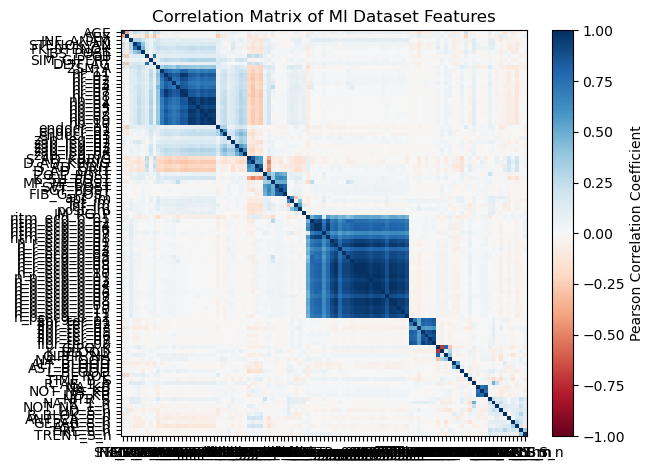

In [111]:
print("1. Calculate the Pearson correlation matrix of the features.")
pearson_corr = X.corr(method='pearson')

# Define a threshold
threshold = 0.85

# Create a list to store pairs and their correlation values
high_corr_pairs = []

# Iterate over the correlation matrix to extract feature pairs with correlations above the threshold
for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            # Sort the pair to avoid duplicates in different orders
            feature_pair = tuple(sorted([pearson_corr.columns[i], pearson_corr.columns[j]]))
            high_corr_pairs.append((feature_pair[0], feature_pair[1], pearson_corr.iloc[i, j]))

# Print out the pairs and their correlation values
for pair in high_corr_pairs:
    print(f'Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}')

print("2. Visualize the correlation matrix as a heatmap.")
plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

# add axes labels
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns)

# colorbar and labeling
plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Correlation Matrix of MI Dataset Features')

# Display the heatmap
plt.tight_layout()
plt.show()

Based on this information about feature correlation, we can see that many features are highly correlated with each other. This indicates that we can drop some features to reduce the complexity of the model (thus reduce the risk of overfitting), but we run into the problem of many features appear multiple times in a given correlation pair.  


In [12]:
over_85 = ['np_07', 'np_05', 'np_01', 'np_10', 'np_04', 'np_09', 'nr_08', 'nr_01', 'nr_07', 'ritm_ecg_p_06', 'ritm_ecg_p_04', 'n_r_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_10', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_02', 'n_r_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_r_ecg_p_06', 'fibr_ter_05', 'n_r_ecg_p_04', 'fibr_ter_08', 'D_AD_ORIT', 'GT_POST', 'ritm_ecg_p_02']
print(len(over_85))
X = X.drop(columns=over_85) # drop columns with over 80% missing values

32


2. Visualize the correlation matrix as a heatmap.


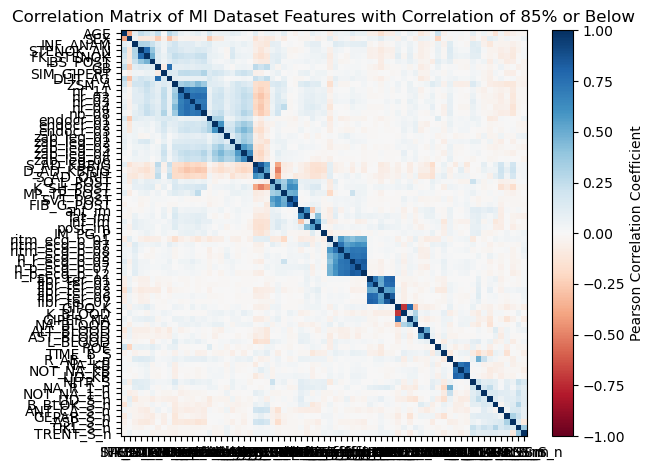

In [13]:
pearson_corr = X.corr(method='pearson')

# Define a threshold
threshold = 0.85

# Create a list to store pairs and their correlation values
high_corr_pairs = []

# Iterate over the correlation matrix to extract feature pairs with correlations above the threshold
for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            # Sort the pair to avoid duplicates in different orders
            feature_pair = tuple(sorted([pearson_corr.columns[i], pearson_corr.columns[j]]))
            high_corr_pairs.append((feature_pair[0], feature_pair[1], pearson_corr.iloc[i, j]))

# Print out the pairs and their correlation values
for pair in high_corr_pairs:
    print(f'Features: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}')

print("2. Visualize the correlation matrix as a heatmap.")
plt.imshow(pearson_corr, cmap='RdBu', vmin=-1, vmax=1) # coefficient is between -1 and 1

# add axes labels
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns)

# colorbar and labeling
plt.colorbar(label='Pearson Correlation Coefficient')
plt.title('Correlation Matrix of MI Dataset Features with Correlation of 85% or Below')

# Display the heatmap
plt.tight_layout()
plt.show()

In [14]:
print(X.columns)
print(X.shape)

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_02', 'nr_03', 'nr_04',
       'np_08', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG',
       'D_AD_KBRIG', 'S_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
       'SVT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_07', 'ritm_ecg_p_08',
       'n_r_ecg_p_03', 'n_r_ecg_p_05', 'n_p_ecg_p_07', 'n_p_ecg_p_12',
       'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_06',
       'fibr_ter_07', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD',
       'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'NA_KB',
       'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NOT_NA_1_n', 'LID_S_n',
       'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n',
       'TRENT_S_n'],
      dtype='object')
(170

By this point, I have removed these columns from the original dataset:
1. The "ID" column = 1
2. Advised by dataset authors: R_AB_2_n, R_AB_3_n, NA_R_2_n, NA_R_3_n, NOT_NA_2_n, and NOT_NA_3_n = 6
3. Target variables (unused) = 11
4. Columns with over 80% missing: IBS_NASL, KFK_BLOOD = 2
5. Target variable (used, in y) = 1
6. Features that have over 85% correlation: Columns 'np_07', 'np_05', 'np_01', 'np_10', 'np_04', 'np_09', 'nr_08', 'nr_01', 'nr_07', 'ritm_ecg_p_06', 'ritm_ecg_p_04', 'n_r_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_06', 'n_p_ecg_p_10', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_02', 'n_r_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_r_ecg_p_06', 'fibr_ter_05', 'n_r_ecg_p_04', 'fibr_ter_08', 'D_AD_ORIT', 'GT_POST', 'ritm_ecg_p_02' = 32

In total, 53 columns are removed. So there are 124 - 53 = 71 columns left. I can revisit if some of these columns should be added back as I train my model. 

# Split the data into different sets
Splitting methods: 
1. iid data: basic split, K-fold Cross-Validation, stratified split, stratified K-fold
2. non-iid data: GroupKFold, GroupShuffleSplit, TimeSeriesSplit

**Q1** How would you split this data and why?

I am choosing to focus on the time point 24 hours after a patient is admitting to the hospital because this time point allows for assessment of the patient's response to initial treatment and interventions, prediction of early complications that may arise within the first day, and provide a snapshot of the patient's condition after stabilization efforts first begin. Thus, I can drop the non-applicable columns (as advised by the dataset authors themselves), which include columns 94, 95, 101, 102, 104, and 105. However, I do recognize that only focusing on this time point may mean that I cannot capture complications that develop later or may be influenced by further treatment interventions.  
We have ruled out that this data is iid, given that it has no group (patients only appear once in the dataset) nor a time series structure (there is not data taken at different time points given we have focused on a specific time point of patient data taken). Knowing this, I will choose to use **stratified KFold splitting** since the target variable I am dealing with is significantly imbalanced, this is a classification problem, and KFold enables a robust approach to evaluating how well my model will deal with different subsets of the dataset. 

**Q2** Split the dataset into training, validation, and test sets.

I will use this splitting method in a loop with various random states for cross validation!

In [15]:
# Prep for splitting: separate the feature matrix X, and the target variable Y
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# already loaded dataset and partitioned X and y

# SPLITTING
# Use KFold Cross-Valiation to split the data - unshuffled data can introduce errors while training the model
random_state = 0
test_size = 0.2
n_splits = 4
splits = []

# Split the dataset into cross validation, training, and test set
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state) # leaves train_size + val_size data behind
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=random_state)

print("X_train:")
display(X_train)
print("X_CV:")
display(X_CV)
print("X_test:")
display(X_test)

X_train:


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1640,75.0,1,4.0,7.0,5.0,3.0,4.0,2.0,8.0,5.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
563,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
629,75.0,1,1.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1218,81.0,0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
452,42.0,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,56.0,1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
352,61.0,1,0.0,0.0,0.0,2.0,2.0,0.0,7.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
893,54.0,0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1563,56.0,1,3.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


X_CV:


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1303,NaN,1,1.0,3.0,2.0,1.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1256,54.0,0,0.0,1.0,2.0,2.0,0.0,1.0,8.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1519,67.0,1,0.0,1.0,2.0,2.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1360,84.0,0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,5.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1304,85.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,50.0,1,1.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
916,37.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
870,52.0,1,0.0,0.0,0.0,2.0,3.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
280,52.0,1,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


X_test:


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
778,54.0,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
370,53.0,1,2.0,1.0,2.0,2.0,2.0,0.0,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
514,82.0,0,2.0,5.0,2.0,2.0,2.0,0.0,7.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1381,59.0,1,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
956,66.0,0,1.0,3.0,2.0,1.0,0.0,1.0,8.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,67.0,1,1.0,6.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1505,67.0,1,1.0,2.0,3.0,2.0,2.0,0.0,8.0,0.0,...,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
872,64.0,1,1.0,1.0,2.0,1.0,3.0,0.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1577,54.0,1,1.0,7.0,5.0,3.0,4.0,2.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Q3** Is your splitting method reproducible? How do you know? 

It is reproducible because my sets remain the same no matter how many times I rerun the cell. I've fixed the sets by setting the random_state to a constant. 

# Preprocess the data
Preprocessing methods: 
1. OneHotEncoder - converts unordered categorical features into dummy arrays
2. OrdinalEncoder - converts ordinal features into an integer array
3. MinMaxScaler - scales continuous variables to be between 0 and 1
4. StandardScaler - standardies continuous features by removing the mean and scaling to unit variance

**Q1** What preprocessors will you use and why?

- categorical features -> onehotencoder: Creates binary columns for each category. Useful for nominal data where categories don’t have an intrinsic order. Helps avoid misleading interpretations from label encoding.
- continuous features -> minmaxscaler or standardscaler (default to standard scaler because you don't have to know what the range is), the continuous features (e.g., age, blood test results) have different ranges or units so scaling helps normalize them such that the model treats all features equally
    - for deciding between minmax and standard, I determined by looking at the distribution of data from my EDA visualizations and decide which features appear to have significant outliers (which I would use Standard Scaler for) and which do not (which I would use MinMax for).

I will most likely apply StandardScaler to all of the features after preprocessing, since it's good practice to scale all features (even the one-hot encoded and ordinal features) to have a 0 mean and 1 standard deviation according to the professor. 

**Q2** Preprocess your data.

In [16]:
# PREPROCESSING
from sklearn.compose import ColumnTransformer

# already labeled continuous, categorical, and ordinal features
# don't need to use ordinalencoder bc ordinal features are already numeric and represent a meaningful order 
# split continuous features into those scaled by minmax or standard

all_ftrs = X.columns.tolist()
ordinal_ftrs = [
    'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 
    'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n'
]
minmax_ftrs = ["AGE", "S_AD_KBRIG", "S_AD_ORIT"] # minmax features: outliers are not as prominent and there is a defined range
standard_ftrs = ["D_AD_KBRIG", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"] #standard features: outliers are significant and range is muddy
onehot_ftrs = list(set(all_ftrs) - set(minmax_ftrs) - set(standard_ftrs) - set(ordinal_features))


# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_ftrs),  # Scale continuous features
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs)
    ])

# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
    
# collect feature names
feature_names = preprocessor.get_feature_names_out()
    
df_train = pd.DataFrame(data=X_prep, columns=feature_names)
    
# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV, columns = feature_names)
    
# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)

print("Preprocessed X_train (df_train):")
display(df_train)
print("Preprocessed X_CV (df_CV):")
display(df_CV)
print("Preprocessed X_test (df_test):")
display(df_test)

Preprocessed X_train (df_train):


,standard__D_AD_KBRIG,standard__K_BLOOD,standard__NA_BLOOD,standard__ALT_BLOOD,standard__AST_BLOOD,standard__L_BLOOD,standard__ROE,minmax__AGE,minmax__S_AD_KBRIG,minmax__S_AD_ORIT,...,onehot__zab_leg_04_2.0,onehot__zab_leg_01_0.0,onehot__zab_leg_01_1.0,onehot__zab_leg_01_2.0,onehot__FIB_G_POST_0.0,onehot__FIB_G_POST_1.0,onehot__FIB_G_POST_2.0,onehot__endocr_01_0.0,onehot__endocr_01_1.0,onehot__endocr_01_2.0
0,NaN,2.449197,0.991859,-0.487713,-0.445615,-0.413826,-0.742555,0.742424,NaN,0.375000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,NaN,1.771996,-1.341072,1.364445,1.254019,0.879655,1.365859,0.393939,NaN,0.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,-0.660581,-0.995496,-0.948090,0.944176,0.742424,NaN,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,NaN,-0.530488,-0.563428,-0.487713,0.504180,-0.554422,2.799581,0.833333,NaN,0.666667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,-0.695017,-0.826891,0.242424,NaN,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,0.146713,-0.718957,0.277845,0.154256,-0.104515,-0.405209,0.454545,NaN,0.541667,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016,NaN,NaN,NaN,NaN,NaN,-0.385707,-0.573882,0.530303,NaN,0.416667,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1017,NaN,0.282153,-0.563428,1.932440,0.704137,-0.245111,0.269484,0.424242,NaN,0.541667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1018,NaN,-1.478570,-0.563428,-0.660581,-0.345636,-0.385707,NaN,0.454545,NaN,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Preprocessed X_CV (df_CV):


,standard__D_AD_KBRIG,standard__K_BLOOD,standard__NA_BLOOD,standard__ALT_BLOOD,standard__AST_BLOOD,standard__L_BLOOD,standard__ROE,minmax__AGE,minmax__S_AD_KBRIG,minmax__S_AD_ORIT,...,onehot__zab_leg_04_2.0,onehot__zab_leg_01_0.0,onehot__zab_leg_01_1.0,onehot__zab_leg_01_2.0,onehot__FIB_G_POST_0.0,onehot__FIB_G_POST_1.0,onehot__FIB_G_POST_2.0,onehot__endocr_01_0.0,onehot__endocr_01_1.0,onehot__endocr_01_2.0
0,-0.524353,NaN,NaN,-0.487713,-0.795539,-0.948090,-0.911228,NaN,0.423077,0.625000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.979626,NaN,NaN,0.450714,0.504180,0.879655,-0.573882,0.424242,0.653846,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,1.636555,-0.407900,-0.487713,0.154256,0.429748,-0.152199,0.621212,NaN,0.458333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,0.485987,-0.911228,0.878788,NaN,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.023027,-2.562092,-1.963187,0.426018,0.904094,1.470157,0.016474,0.893939,0.538462,0.541667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,NaN,0.417593,-0.096842,0.796450,0.904094,1.610752,-0.742555,0.363636,NaN,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
336,NaN,-1.072249,-1.030014,-0.660581,-0.595583,0.992131,-0.742555,0.166667,NaN,0.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
337,NaN,0.146713,-0.096842,-0.858145,-0.995496,-0.245111,-0.658218,0.393939,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
338,NaN,0.282153,1.147387,0.277845,0.154256,-0.554422,-0.067862,0.393939,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Preprocessed X_test (df_test):


,standard__D_AD_KBRIG,standard__K_BLOOD,standard__NA_BLOOD,standard__ALT_BLOOD,standard__AST_BLOOD,standard__L_BLOOD,standard__ROE,minmax__AGE,minmax__S_AD_KBRIG,minmax__S_AD_ORIT,...,onehot__zab_leg_04_2.0,onehot__zab_leg_01_0.0,onehot__zab_leg_01_1.0,onehot__zab_leg_01_2.0,onehot__FIB_G_POST_0.0,onehot__FIB_G_POST_1.0,onehot__FIB_G_POST_2.0,onehot__endocr_01_0.0,onehot__endocr_01_1.0,onehot__endocr_01_2.0
0,NaN,-0.665928,1.769502,1.191577,0.154256,-0.216992,-0.489545,0.424242,NaN,0.541667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,NaN,NaN,NaN,-0.487713,-0.595583,0.879655,1.534532,0.409091,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.023027,0.959354,0.214215,0.623582,-0.245658,-0.610660,0.100811,0.848485,0.500000,0.625000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.478300,-1.478570,-0.563428,NaN,NaN,-0.863732,-0.826891,0.500000,0.615385,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,0.176676,-0.911228,0.606061,NaN,0.833333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.023027,NaN,NaN,NaN,NaN,0.373510,-0.911228,0.621212,0.500000,0.541667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
336,-0.524353,0.553034,-0.407900,NaN,NaN,2.426207,1.703205,0.621212,0.423077,0.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
337,NaN,-0.530488,0.525273,-0.290150,0.154256,2.201254,-0.911228,0.575758,NaN,0.583333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
338,-1.025680,NaN,NaN,NaN,NaN,0.373510,-0.742555,0.424242,0.307692,0.166667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


**Q3** How many features and data points do you have before and after preprocessing?

I have the same number of data points (1020 + 340 + 340 = 1700), but the features increased from 71 to 175 because of the OneHot encoding that took place. 

# Choose an evaluation metric
This depends on the priorities of the stakeholders, requires some thinking and ethical considerations. This is a classifcation problem, meaning our options for evaluation metrics include:
1. Accuracy - Proportion of correctly predicted outcomes across all classes (misleading if data is imbalanced)
2. Recall - proportion of lethal outcomes correctly identitifed out of all actual lethal outcomes (ensures fewer critical cases are overlooked)
3. Precision - proportion of correctly predicted lethal outcomes out of all cases predicted as lethal (ensures actionable predictions are reliable)
4. Specificity - proportion of true negatives correctly identified (over-predicting lethal outcomes can lead to unnecessary interventions)
5. FBeta Score - harmonic mean of precision and recall (provides balance when cost of false positives and false negatives is comparable)
6. ROC - measures trade-offs between tpr and fpr for each class (gives insight into how well the model distinguishes between classes)
7. Logloss - measures uncertainty of model's predictions by comparing predicted probabilities against true class (penalizes predictions that are confident but incorrect)

## Stakeholder and ethical considerations
### Class importance
Some classes (anything defined as a lethal outcome) will have a higher priority than others. Methods like weighted- or micro-averaging may be key here, since the goal from our model predictions would most likely be to find courses of action against these lethal outcomes. Metrics such as recall, precision, and fbeta may be most helpful here. 
### Imbalanced data
As depicted in our visualization of the target variable distribution, lethal outcomes make up a small proportion (around 20%). Thus, metrics that do not rely on true negatives (like accuracy) are best. More specifically, fbeta and averaging methods of fbeta would be best suited since they directly account for class imbalance.
## Stakeholder priorities
Considering this would be used as a medical diagnostic tool, it appears that recall would be the metric slightly prioritized here because false negatives (failing to identify a lethal outcome) tend to have far more serious consequences than false positives (incorrectly flagging a healthy patient with a lethal outcome, or diagnosing a patient with the wrong lethal outcome). This does bring up some considerations:
- if the patient is incorrectly diagnosed and has to undergo unnecessary stress, costs, or invasive procedures, what outcome will that yield?
- if a patient does have a lethal outcome but it is incorrectly flagged as another, is it better than they have attention brought to the fact that they are "unhealthy" at the least, or will it be more fatal that they are treated for another condition and thus miss essential treatments? How involved is the medical team in taking precaution towards the predictive strength of the model (i.e. will they double check before jumping straight into treating the condition the model predicts for the patient)?
Considering these facts, we recognize precision is also very essential to the model. We want to ensure that we are minimizing harm while also trying to capture as many actual postive cases as we can. Thus, we should strive for a balance in the two metrics, which fbeta does. 

## Evaluation metric workflow
I will use fbeta and log loss in my evaluation process:
- fbeta gives me an idea of how well my model balances precision and recall with imbalanced data
- loglostt will give me an understanding of how confident the model is in its predictions and how far the predicted probabilities are from the actual class labels.

Proposed workflow:
1. Use weighted F_beta score for initial evaluation where beta = 1 for initial evaluation (precision and recall are prioritized equally)
2. After model training, generate and analyze confusion matrix to identify critical misclassification patterns (accuracy, precision, recall)
3. Compute log loss scores to evaluate how well the model's predicted probabilities align with the actual outcomes
4. Tweak any parameters as necessary

# Choose one or more ML techniques
Try at least four different ML algorithms we covered in class on your dataset and at least two of those models should be non-linear.
We are working with a multiclass classification problem in which our dataset has missing values in our continuous feature variables, meaning our options are:
1. Reduced feature SVM rbf classification (nonlinear) - good for small to medium-sized datasets and can handle multiclass problems
2. Reduced feature random forest classification (nonlinear) - handles multiclass classification, robust to overfitting with enough trees, good interpretability
3. Reduced feature XGBoost (nonlinear) - achieves high accuracy, handles imbalanced datasets and missing values well
4. Reduced feature logistic regression (linear) - works with multiclass problems, easy to interpret and computationally efficient
5. Reduced feature KNN (nonlinear) - works well for small datasets, easy to implement, can handle multiclass classifciation

## ML model workflow
### Preliminary
1. Split dataset into training and test set (stratified basic)
2. Choose a given model and understand how it works with reduced features and multiclass prediction
3. For each model, set a number of random states to iterate over multiple different set random states to evaluate model's generalization ability (more robust insight)
4. Save the model from each random state and corresponding test scores
5. Calculate the mean and standard deviation of the test scores 

### Cross validation
1. Split dataset into training, CV, test set (stratified kfold)
2. Choose a given model and understand how it works with reduced features and multiclass prediction
3. For each model, set a number of random states to iterate over multiple different set random states to evaluate model's generalization ability (more robust insight)
4. For each set of parameters to try out, find the set that yields the best model
5. Save the best model from each random state and corresponding test scores
6. Calculate the mean and standard deviation of the test scores 

## Preliminary model training

### 1. Multiclass Logistic Regression with basic split
need to do

## LOGREG

In [ ]:
from sklearn.metrics import log_loss, fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

def log_reg_ovr_l1(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["l1"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = OneVsRestClassifier(LogisticRegression(random_state=random_state))

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg ovr l1:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

def log_reg_ovr_l2(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["l2"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = OneVsRestClassifier(LogisticRegression(random_state=random_state))

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg ovr l2:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

def log_reg_ovr_en(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__l1_ratio": np.linspace(0, 1, 21),
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["elasticnet"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = OneVsRestClassifier(LogisticRegression(random_state=random_state))

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg ovr elasticnet:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

In [ ]:
def log_reg_multi_l1(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["l1"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = LogisticRegression(random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg multinom l1:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

def log_reg_multi_l2(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["l2"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = LogisticRegression(random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg multinom l2:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

def log_reg_multi_en(X_other, y_other, kf, random_state):
    # X must be dataframe, y just leave as is
    
    # parameter setting
    param_grid = {
        "estimator__C": 1 / np.logspace(-2, 2, 21),  # Convert alpha to C (C = 1/alpha)
        "estimator__l1_ratio": np.linspace(0, 1, 21),
        "estimator__solver": ["saga"],  # Saga solver supports L1 regularization
        "estimator__penalty": ["elasticnet"],  # L1 regularization
        "estimator__max_iter": [10000],  # Ensure convergence
        "estimator__tol": [1e-4]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for ovr
    model = LogisticRegression(random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for logreg multinom elasticnet:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

## XGBOOST

In [ ]:
import xgboost
from sklearn.model_selection import ParameterGrid

def xgb_model(X_other, y_other, kf, random_state):
    # make into row vectors to avoid an obnoxious sklearn/xgb warning
    y_train = np.reshape(np.array(y_other), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()

    XGB = xgboost.XGBClassifier()
    
    # parameter setting
    param_grid = {"learning_rate": [0.03],
                  "n_estimators": [10000],
                  "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  "missing": [np.nan], 
                  "max_depth": [1,3,10,30,100],
                  "colsample_bytree": [0.9],              
                  "subsample": [0.66]}
    
    pg = ParameterGrid(param_grid)

    scores_fbeta = np.zeros(len(pg))
    scores_logloss = np.zeros(len(pg))

    beta = 1

    for i, params in enumerate(pg):
        # if verbose >= 5:
        #     print("Param set " + str(i + 1) + " / " + str(len(pg)))
        fold_fbeta_scores = []
        fold_logloss_scores = []
        
        for train_idx, val_idx in kf.split(X_other, y_other):
            X_train, X_CV = X_other[train_idx], X_other[val_idx]
            y_train, y_CV = y_other[train_idx], y_other[val_idx]

            XGB.set_params(**params, early_stopping_rounds=50, random_state=random_state, objective='multi:softmax', num_class=8)
            eval_set = [(X_CV, y_CV)]

            XGB.fit(X_train, Y_train,
                eval_set=eval_set, verbose=False) # with early stopping
            
            # Validate on the holdout fold
            y_val_pred = XGB.predict(X_val)
            y_val_proba = XGB.predict_proba(X_val)

            # Compute F-beta and log loss
            fold_fbeta_scores.append(fbeta_score(y_val, y_val_pred, beta=beta, average='weighted'))
            fold_logloss_scores.append(log_loss(y_val, y_val_proba, labels=[0,1,2,3,4,5,6,7]))

    # Average the scores across folds
    scores_fbeta[i] = np.mean(fold_fbeta_scores)
    scores_logloss[i] = np.mean(fold_logloss_scores)
    
     # Find the best parameters
    best_idx = np.argmin(scores_logloss)  # Maximize F-beta
    best_params = pg[best_idx]

    # Retrain on the full training set with the best parameters
    XGB.set_params(**best_params, early_stopping_rounds=50, random_state=random_state)
    XGB.fit(X_other, y_other)

    print("Best parameters for xgboost:")
    print(best_params)

    return XGB

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "estimator__max_depth": [1, 3, 10, 30, 100],
        "estimator__max_features": [0.5, 0.75, 1.0]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for 
    model = RandomForestClassifier(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for random forest classification:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

## KNN classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "estimator__n_neighbors": [1, 3, 10, 30, 100],
        "estimator__weight": ["uniform", "distance"]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for 
    model = KNeighborsClassifier(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for random forest classification:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

## SVM classification

In [ ]:
from sklearn.svm import SVC
def svc(X_other, y_other, kf, random_state):

    # parameter setting
    param_grid = {
        "estimator__gamma": [1e-3, 1e-1, 1e1, 1e3, 1e5],
        "estimator__C": [1e-2, 1e-1, 1e0, 1e1, 1e2]
    }

    # Define a custom scorer for weighted F-beta
    beta = 1  # Example beta value
    fbeta_scorer = make_scorer(fbeta_score, beta=beta, average='weighted')
    
    # Predefined log loss scorer (from scikit-learn)
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, response_method='predict_proba', labels=[0, 1, 2, 3, 4, 5, 6, 7])  # Log loss requires probabilities
    
    # initialize model for 
    model = SVC(random_state = random_state)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring={"log_loss": log_loss_scorer, "fbeta": fbeta_scorer},  # Multiple metrics
        refit="log_loss",  # Optimize using log loss (or change to "fbeta")
        cv=kf,  # 3-fold cross-validation
        verbose=1,
    )

    # fit the model
    grid_search.fit(X_other, y_other)
    print("Best parameters for SVM Classification:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_

## ML Pipeline Framework

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import log_loss, fbeta_score

random_states = [0, 42] # diff random states
n_folds = 3

def ML_pipeline(algo, X, y, random_state):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

    # create train and cv sets
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 
    
    # create the pipeline: preprocessor + supervised ML method
    all_ftrs = X.columns.tolist()
    ordinal_ftrs = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'DLIT_AG', 'ZSN_A', 'TIME_B_S', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']
    minmax_ftrs = ["AGE", "S_AD_KBRIG", "S_AD_ORIT"] # minmax features: outliers are not as prominent and there is a defined range
    standard_ftrs = ["D_AD_KBRIG", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"] #standard features: outliers are significant and range is muddy
    onehot_ftrs = list(set(all_ftrs) - set(minmax_ftrs) - set(standard_ftrs) - set(ordinal_ftrs))

    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('standard', StandardScaler(), standard_ftrs),  # Scale continuous features
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_ftrs)
        ])

    # scale all features 
    final_scaler = StandardScaler()

    # PREPROCESS: manual
    # fit_transform the training set
    X_other_prep = preprocessor.fit_transform(X_other)
    X_other_scaled = final_scaler.fit_transform(X_other_prep)

    feature_names = preprocessor.get_feature_names_out()
    df_X_other = pd.DataFrame(data=X_other_scaled,columns=feature_names)
    
    # transform the test
    X_test_prep = preprocessor.transform(X_test)
    X_test_scaled = final_scaler.transform(X_test_prep)
    df_X_test = pd.DataFrame(data=X_test_scaled,columns = feature_names)

    # ensure all inputs are dataframes
    # inputs: df_X_other, y_other, df_X_test, y_test

    # find all unique patterns of missing value in test set
    mask = df_X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test_prob = pd.DataFrame()
    
    print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern

                sub_X_test = pd.concat([sub_X_test, df_X_test.iloc[[j]]])# append the according X_test row j to the subset
                if not y_test.iloc[[j]].empty:
                    sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])

        sub_X_test = sub_X_test[df_X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_other = pd.DataFrame()
        sub_y_other = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_other = df_X_other[df_X_other.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_other = sub_X_other.dropna()
        # 3.cut the sub_y_train and sub_y_CV accordingly
        sub_y_other = y_other.iloc[sub_X_other.index]

        if sub_X_other.empty or sub_X_other.empty:
            continue # Skip this unique pattern

        # find best model
        best_model = algo(sub_X_other, sub_y_other, kf, random_state)

        # Make predictions on the test set (sub_X_test) using the best model
        sub_y_test_pred = best_model.predict(sub_X_test)
        sub_y_test_prob = best_model.predict_proba(sub_X_test)  # For log loss, need probability predictions
    
        # Collect the predicted probabilities
        sub_y_test_prob_df = pd.DataFrame(sub_y_test_prob)  # Convert to pandas DataFrame
        all_y_test_prob = pd.concat([all_y_test_prob, sub_y_test_prob_df])
    
        # Collect the predicted labels for comparison
        sub_y_test_pred_df = pd.Series(sub_y_test_pred)
        all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred_df])

    # Rank the final predicted probabilities according to the original y_test index
    all_y_test_prob = all_y_test_prob.sort_index()
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    
    # Get scores
    total_fbeta = fbeta_score(y_test, all_y_test_pred, beta=beta, average='weighted')
    total_logloss = log_loss(y_test, all_y_test_prob, labels=[0, 1, 2, 3, 4, 5, 6, 7])
    return total_fbeta, total_logloss

fbetas = []
loglosses = []

# put in loop w multiple random states
fbeta, logloss = ML_pipeline(log_reg_ovr_l1, X, y, 0)
# fbetas.append(fbeta)
# loglosses.append(logloss)

print(f"F-beta score ({fbeta}):")

print(f"Log Loss ({logloss}):")

# # u should avg the scores bc its over random states
# # Find the index of the best F-beta and Log Loss scores
# best_fbeta_index = np.argmax(fbetas)  # Highest F-beta score (argmax)
# best_logloss_index = np.argmin(loglosses)  # Lowest Log Loss score (argmin)

# # best fbeta and log loss scores
# best_fbeta_score = fbetas[best_fbeta_index]
# best_logloss_score = loglosses[best_logloss_index]

# # Return the models with the best F-beta and Log Loss
# print(f"best F-beta score ({best_fbeta_score}):")

# print(f"best Log Loss ({best_logloss_score}):")

there are 31 unique missing value patterns.
working on unique pattern 0
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 1
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 2
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 3
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 4
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 5
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 6
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


working on unique pattern 7
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


working on unique pattern 8
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


working on unique pattern 9
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


working on unique pattern 10
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


working on unique pattern 11
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


working on unique pattern 12
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])


working on unique pattern 13
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 14
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 15
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 16
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

working on unique pattern 17
Fitting 3 folds for each of 21 candidates, totalling 63 fits


/var/folders/m5/sgnzj9rs3_z0k3p6zkwt1rr40000gn/T/ipykernel_25602/3285099564.py:75: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/en

KeyboardInterrupt: 

# Tune the hyperparameters of your ML models (aka cross-validation)
Based on professor advice:
1. Reduced feature SVM rbf classification (nonlinear) - tune C, gamma. figure out scale
2. Reduced feature random forest classification (nonlinear) - tune max_features, max_depth. figure out scale
3. Reduced feature XGBoost (nonlinear) - tune max_depth, reg_alpha, reg_lambda. set `colsample_bytree` and `subsample` to a little less than 1 to avoid overfitting. set number of trees to 10000. use early_stopping = 50. leave everything else as default.
4. Reduced feature logistic regression (linear) - tune l1 and/or l2 reg. figure out scale
5. Reduced feature KNN (nonlinear) - tune n_neighbors, weight. figure out scale

# Interpret your model

In [ ]:
# # Define the model
# xgb_model = XGBClassifier(
#     n_estimators=1000, 
#     learning_rate=0.1, 
#     max_depth=6, 
#     random_state=42, 
#     use_label_encoder=False,
#     eval_metric="logloss"
# )

# # Wrap everything in a pipeline
# pipeline = Pipeline(
#     steps=[
#         ("preprocessor", preprocessor),
#         ("classifier", xgb_model),
#     ]
# )